IMPORTS

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
df = pd.read_csv('539302.csv')

In [0]:
df.reset_index(drop=True, inplace=True)

In [5]:
df.shape

(82, 13)

In [6]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,30-April-2020,395.00,397.05,378.95,381.65,385.119839,993,225,382424.0,430,43.30,18.10,-13.35
1,29-April-2020,386.95,394.60,381.00,387.90,387.457847,771,81,298730.0,458,59.40,13.60,0.95
2,28-April-2020,379.60,386.30,364.00,377.30,375.492326,847,149,318042.0,424,50.06,22.30,-2.30
3,27-April-2020,389.85,389.95,368.00,371.55,374.463710,1488,155,557202.0,1204,80.91,21.95,-18.30
4,24-April-2020,400.00,400.00,378.55,379.95,386.914620,855,155,330812.0,496,58.01,21.45,-20.05


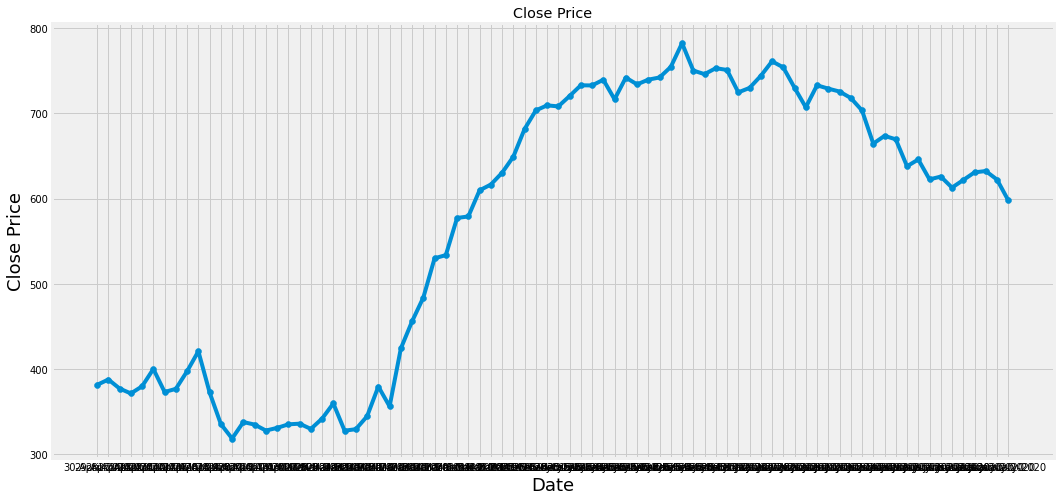

In [7]:
#Visualize the features
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.scatter(df['Date'], df['Close Price'])
plt.plot(df['Date'], df['Close Price'])

plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

Feature Engineering

In [0]:
#Create a new dataframe with only the 'feature' column
data = df.filter(['Close Price'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [9]:
training_data_len

66

In [0]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [11]:
len(scaled_data)

82

Train and Test Split

In [12]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
len(train_data)

66

In [0]:
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(5, len(train_data)):
    x_train.append(train_data[i-5:i,0])
    y_train.append(train_data[i,0])

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

Build the Architecture

In [0]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
# from keras.layers import Dropout

# # Initialising the RNN
# model = Sequential()
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# #model.add(Dropout(0.2))
# # Adding a second LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = False))
# #model.add(Dropout(0.2))
# # Adding a third LSTM layer and some Dropout regularisation
# # model.add(LSTM(units = 50, return_sequences = True))
# # model.add(Dropout(0.2))
# # Adding a fourth LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50))
# #model.add(Dropout(0.2))
# # Adding the output layer
# # For Full connection layer we use dense
# # As the output is 1D so we use unit=1
# model.add(Dense(units = 25))
# # Compiling the RNN
# # For optimizer we can go through keras optimizers Docomentation
# # As it is regression problem so we use mean squared error
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')


Train The Model

In [17]:
#Train the model
model.fit(x_train, y_train, batch_size=50, epochs=100)

Epoch 1/100
61/61 [==============================] - 1s 14ms/step - loss: 0.3440
Epoch 2/100
61/61 [==============================] - 0s 339us/step - loss: 0.2618
Epoch 3/100
61/61 [==============================] - 0s 321us/step - loss: 0.1827
Epoch 4/100
61/61 [==============================] - 0s 306us/step - loss: 0.1152
Epoch 5/100
61/61 [==============================] - 0s 340us/step - loss: 0.0568
Epoch 6/100
61/61 [==============================] - 0s 318us/step - loss: 0.0251
Epoch 7/100
61/61 [==============================] - 0s 321us/step - loss: 0.0263
Epoch 8/100
61/61 [==============================] - 0s 351us/step - loss: 0.0496
Epoch 9/100
61/61 [==============================] - 0s 323us/step - loss: 0.0513
Epoch 10/100
61/61 [==============================] - 0s 318us/step - loss: 0.0352
Epoch 11/100
61/61 [==============================] - 0s 333us/step - loss: 0.0213
Epoch 12/100
61/61 [==============================] - 0s 311us/step - loss: 0.0170
Epoch 13/100
6

Testing Dataset 

In [18]:
#Test data set
test_data = scaled_data[training_data_len - 5: , : ]
len(test_data)

21

In [0]:
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(5,len(test_data)):
    x_test.append(test_data[i-5:i,0])

In [0]:
# x_test

In [0]:
# y_test

In [20]:
len(x_test)

16

In [0]:
len(y_test)

In [0]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

Make Predictions

In [0]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

Calculate RMSE

In [27]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

46.581624404157694

Visualizations of Results

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


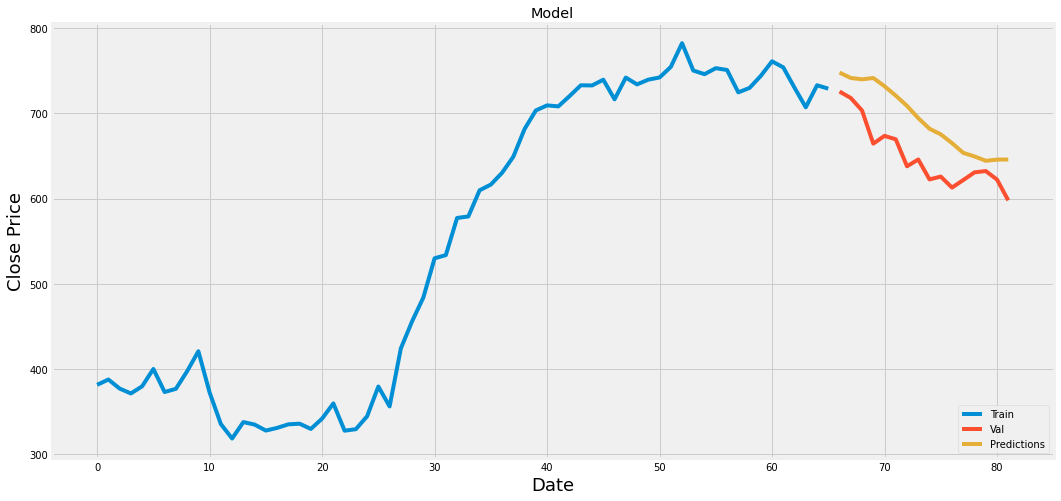

In [29]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
#Show the valid and predicted prices
valid

,Close Price,Predictions
66,725.50,747.697571
67,717.95,741.439575
68,703.30,739.835449
69,664.45,741.388245
70,673.55,731.742859
71,669.50,720.689697
72,637.90,708.685425
73,645.85,694.328125
74,622.50,681.904480
75,625.80,675.331116


Make Future Predictions

In [0]:
df1 = pd.read_csv('train_csv.csv')
df2 = pd.read_csv('test_csv.csv')


valid_csv = pd.concat([df1, df2])

valid_csv.tail
valid_csv.to_csv('valid_csv.csv')

In [33]:
#Get the quote
feature_quote = pd.read_csv('539302.csv')
#Create a new dataframe
new_df = feature_quote.filter(['Close Price'])

#Get teh last 60 day closing price 
last_1_days = new_df[:5].values
#Scale the data to be values between 0 and 1
last_1_days_scaled = scaler.transform(last_1_days)
#Create an empty list
X_test = []
#Append teh past 1 days
X_test.append(last_1_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[400.5386]]
